In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Exercise 03.1

In this first part of the exercise $03.1$ it is asked to compute at time $t=0$ the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$ by sampling directly the prize of the final asset using a geometric brownian motion setting as the initial asset price $S(0)=100$, as the delivery time $T=1$, as the strike price $K=100$, as the risk-free interest rate $r=0.1$ and as volatility $\sigma=0.25$. 

To fulfill this goal I extracted $M = 10^5$ random numbers ($Z_i$) according to a gaussian distribution with $\mu =0$ and $\sigma=1$ and, subsequently, I calculated for each of these numbers $C_i = \exp(-rT)max\left[0,S_i(T)-K\right]$ where $S_i(T) = S(0)\exp\left[(r-\frac{\sigma^2}{2})T + \sigma Z_i\sqrt{T}\right]$. Lastly, to evaluate $C[S(0),0]$ I calculate the average value of the $C_i$s with its uncertainty as a function of the numbers of block $N = 100$. 

The same procedure has been applied to calculated the put-option price, except fot the formula of the $P_i$ that is $\exp(-rT)max\left[S_i(T)-K,0\right]$. 

The second part of the exercise requested to evalute the call-option and the put-option price but in a discretized manner. The time intervall $[0,T]$ was divided in $100$ steps and at each step the asset price was calculated with the following formula 
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$ 
Subsequently, the associated $C_i$ and $P_i$ were computed in the same way as the direct case. 

The result for $C[S(0),0]$ calculated in the direct way and the discretized way are put in comparison in the following plot. Both the result are good compared to the Black-Scholes analytic solution $C[S(0),0] = 14.975790778311286$. However, if it is possible to use the direct way this is preferable for computational reason. 

Text(0.5, 1.0, '$C[S(0),0]$ with error bars')

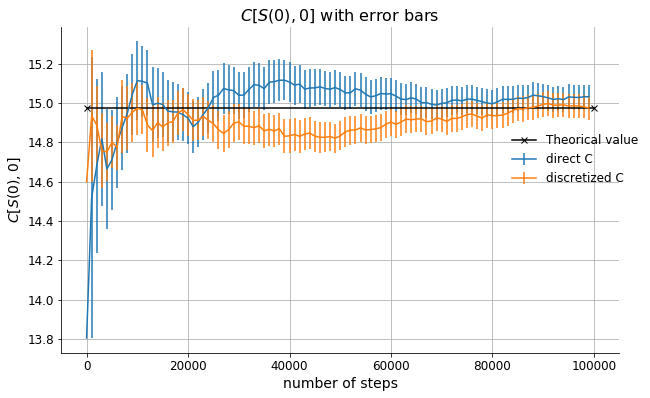

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x1, f1, error1 = np.loadtxt("direct_C.dat", usecols=(0,1,2), unpack='true') #per C diretto
x2, f2, error2 = np.loadtxt("discrete_C.dat", usecols=(0,1,2), unpack='true') #per C discreto
ax.errorbar(x1,f1,yerr=error1, label = "direct C")
ax.errorbar(x2,f2,yerr=error2, label = "discretized C")
ax.plot([0,100000],[14.975790778311286,14.975790778311286], marker = "x", color = "black", label = "Theorical value")
ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"$C[S(0),0]$")
ax.grid(True)
ax.legend(loc=(0.8, 0.5), frameon=False)
ax.set_title(f"$C[S(0),0]$ with error bars")

The same conclusion as for the call-option price can be drawn from the following plot of the out-option price. Here the analitic solution is $P[S(0),0] = 5.4595325819072364$.

Text(0.5, 1.0, '$P[S(0),0]$ with error bars')

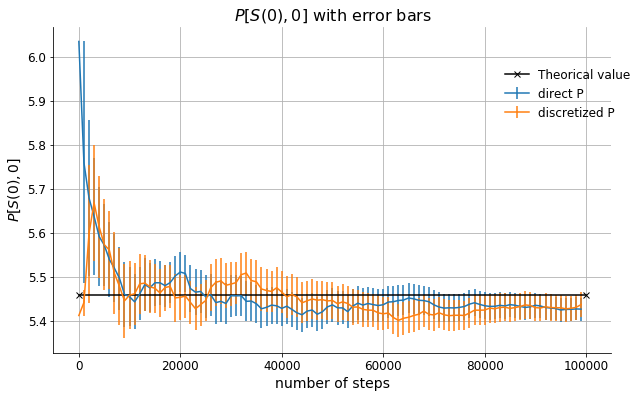

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x1, f1, error1 = np.loadtxt("direct_P.dat", usecols=(0,1,2), unpack='true') #per P diretto
x2, f2, error2 = np.loadtxt("discrete_P.dat", usecols=(0,1,2), unpack='true') #per P discreto
ax.errorbar(x1,f1,yerr=error1, label = "direct P")
ax.errorbar(x2,f2,yerr=error2, label = "discretized P")
ax.plot([0,100000],[5.4595325819072364,5.4595325819072364], marker = "x", color = "black", label = "Theorical value")
ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"$P[S(0),0]$")
ax.grid(True)
ax.legend(loc=(0.8, 0.7), frameon=False)
ax.set_title(f"$P[S(0),0]$ with error bars")